# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I shall be analysing data sourced from [Kaggle][1] via [The Movie Database (TMDb)][2] for the purpose of answering the following quesitons:

1. What relationship exists, if any between Movie Runtime and Popularity?
2. How has the average profit for movies changed over time?
3. How has the average runtime for movies changed over time?
4. How has the percentage of Action and Non-Action movies changed between 2000 and 2015?

Data analysis using python and installed libraries will answer these questions as outlined in the report below. 

[1]:https://www.kaggle.com/tmdb/tmdb-movie-metadata
[2]:https://www.themoviedb.org/ 


In [1]:
#importing necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I'll be loading the movie dataset sourced from Kaggle and examine the data available to me for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Dimensions of TMDB Movie Dataframe
(10866 rows, 21 columns)

In [3]:
df.shape

(10866, 21)

#### Data Frame Summary
Column Names, number of non-null values and data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Above we can see that some of our variables of interest contain null values including 'genre'. This will affect any analysis that needs to take place when considering Action movies and must be cleaned in the next step of the processs.

#### Number of Unique values in each column

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Descriptive stats of each numeric column

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Above we can see that both budget and revenue have rows with 0 values in them. These values will pose problems in answering our questions especially when it comes to profits and correlations betweeen revenue and othe variablles.

#### Number of duplicate rows in the dataframe

In [7]:
sum(df.duplicated())

1


### Data Cleaning

In this step, I will narrow the data set down through the following steps:

1. Removal of duplicate rows
2. Removal of irrelevant columns
3. Removal of rows with null values in Genre
4. Creation of a calculate column for movie profits

#### Dropping Duplicate Rows

In [8]:
#drop duplicate rows

df.drop_duplicates(inplace = True)

In [9]:
df.shape

(10865, 21)

Duplicate row successfully dropped. 

#### Drop irrelevant columns

In [10]:
# Drop columns that are not needed to answer data analysis questions:

df = df.drop(columns =['imdb_id', 'budget', 'revenue', 'cast', 'tagline', 'overview', 'production_companies', 'release_date'], axis =1)

In [11]:
df.head(1)

,id,popularity,original_title,homepage,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Explore Runtime Dataset

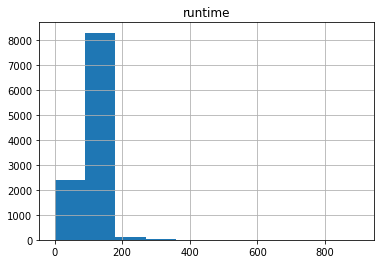

In [12]:
#plot distribution of movie runtime
df.hist(column = 'runtime');

As we can see above there a very few movies with runtime over 200 minutes. For this purpose, any analysis involving runtime will focus on movies with runtime < 200 minutes. A data frame for this analysis will be created below. 

In [13]:
#create dataframe with movies that have runtime < 200 mins
df_runtime = df[df.apply(lambda x: x['runtime'] < 200, axis = 1)]

In [14]:
df_runtime.head()

,id,popularity,original_title,homepage,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df_runtime.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10791.000000,10791.000000,10791.000000,10791.000000,10791.000000,10791.000000,1.079100e+04,1.079100e+04
mean,65700.813178,0.647894,100.633306,217.831619,5.968566,2001.326198,1.756314e+07,5.146574e+07
std,91849.412924,1.000728,23.364953,574.746771,0.932272,12.808817,3.428007e+07,1.444389e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10585.500000,0.208401,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20539.000000,0.384767,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74751.500000,0.716446,111.000000,146.000000,6.600000,2011.000000,2.088506e+07,3.400550e+07
max,417859.000000,32.985763,199.000000,9767.000000,8.900000,2015.000000,4.250000e+08,2.827124e+09


#### Create a new dataframe for examining movie genres

Null values will be removed from the 'genres' column in this data frame.

In [16]:
df_genre= df.dropna(axis = 0, subset=['genres'])

In [17]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
id                10842 non-null int64
popularity        10842 non-null float64
original_title    10842 non-null object
homepage          2931 non-null object
director          10800 non-null object
keywords          9367 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


Null values successfully removed from 'genres' column!

#### Creating a calculated profit column

In [18]:
#create a calculate column for profit
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [19]:
#Ensure profit column exists
df.head()

,id,popularity,original_title,homepage,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


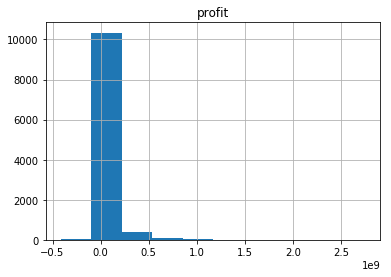

In [20]:
#Look at distribution of movie profits
df.hist(column ='profit');

As we can see above, there are negative profit values (losses). These must be removed from the dataset before any further analysis. 

In [21]:
df['profit'].describe()

count    1.086500e+04
mean     3.381911e+07
std      1.252194e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.293091e+07
max      2.750137e+09
Name: profit, dtype: float64

From the above we can further confirm that negative values of profit exist in the dataframe and must be removed. 

In [22]:
#create dataframe where profits are more than 0
df_prof = df[df.apply(lambda x: x['profit'] > 0, axis = 1)]

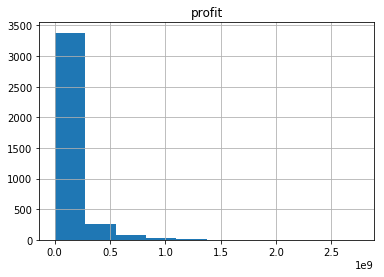

In [23]:
df_prof.hist(column='profit');

Confirmed that all profit values are positive!

<a id='eda'></a>
## Exploratory Data Analysis


### Relationship between Movie Runtime and Popularity

To explore this relationship a scatterplot between the 2 variables will be created using the runtime dataframe created earlier (df_runtime)

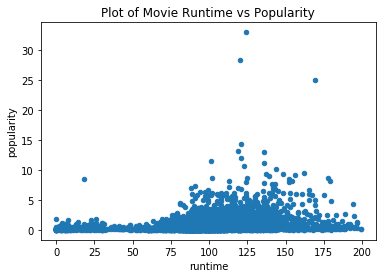

In [24]:
df_runtime.plot(x = 'runtime', y = 'popularity', kind = 'scatter', title = 'Plot of Movie Runtime vs Popularity');

From this scatterplot, an evident relationship does not seem to be clear, however, it appears that the most popular movies centre around a runtime of 125 minutes. 

### Change in Average Movie Runtime over the years

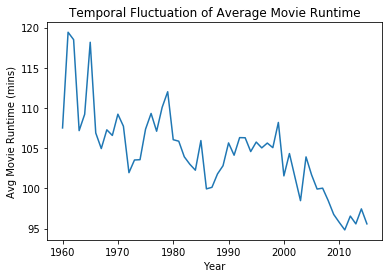

In [25]:
avg_runtime = df_runtime.groupby('release_year')['runtime'].mean()
plt.plot(avg_runtime)
plt.xlabel('Year', size=10)
plt.ylabel('Avg Movie Runtime (mins)', size=10)
plt.title('Temporal Fluctuation of Average Movie Runtime');


While there appears to be a severe fluctuation in movie runtime across the years, it appears movie runtime has, on average, decreased between 1960 and 2015.

### Change in Average Movie Profit over the years

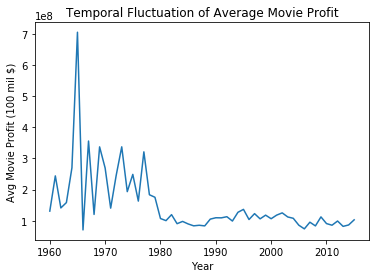

In [26]:
avg_profit = df_prof.groupby('release_year')['profit'].mean()
plt.plot(avg_profit)
plt.xlabel('Year', size=10)
plt.ylabel('Avg Movie Profit (100 mil $)', size=10)
plt.title('Temporal Fluctuation of Average Movie Profit');

There appears to be major fluctuations in average movie profit between 1960 and 1980, however this appears to stablize around $100 million from 1980 to 2015. Its possible that these fluctuations may have been caused by the removal of movies with 0 values in revenue and budget. Let's see:

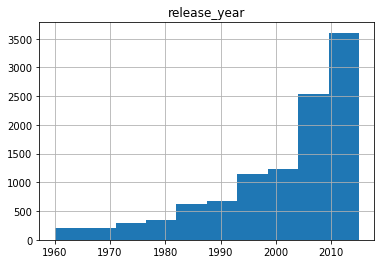

In [27]:
df.hist(column = 'release_year');

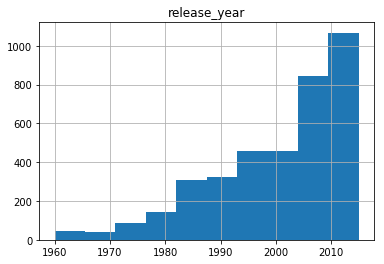

In [28]:
df_prof.hist(column = 'release_year');

From both plots we can see that both the quanity of movies from earlier decade is less than recent ones. Additionally, significant data was removed due to zero values from both revenue_adj and budget_adj columns. Given this, lets look at the average profit trend from 1980 onwards

In [29]:
df_prof1980 = df_prof[df_prof.apply(lambda x: x['release_year'] > 1979, axis = 1)]

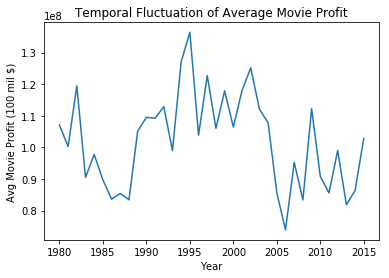

In [30]:
avg_profit = df_prof1980.groupby('release_year')['profit'].mean()
plt.plot(avg_profit)
plt.xlabel('Year', size=10)
plt.ylabel('Avg Movie Profit (100 mil $)', size=10)
plt.title('Temporal Fluctuation of Average Movie Profit');

We can see that Average Movie Profits peaked around 1994 and have somewhat declined since. There seems to be serious reduction in average movie profits during the periods 1986-1988 and 2004-2006.

### Change in proportion of Action and Non Action movies between 2000 and 2015

In [31]:
#create data frane with only movies from the year 2000
df_gen2000 = df_genre[(df_genre['release_year'] == 2000)]

In [32]:
#number of movies released in the year 2000
df_gen2000.genres.count()

226

In [33]:
#create data frame containing movies from 2000 that are Action
df_gen2000act = df_genre[(df_genre['genres'].str.contains('Action')) & (df_genre['release_year'] == 2000)]

In [34]:
#number of movies from the year 2000 that are contain Action as a genre
df_gen2000act.genres.count()

47

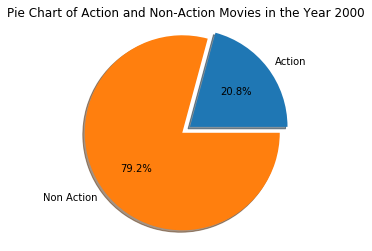

In [35]:
#let A represent an array of the number of Action and Non-Action movies for the year 2000
#Number of Non-Action Movies for 2000 = Total Number of Movies for 2000 - Total Number of Action Movies for 2000
A = np.array([df_gen2000act.genres.count(),((df_gen2000.genres.count())-(df_gen2000act.genres.count()))])
label = ['Action', 'Non Action']
explode = (0.1, 0)
plt.pie(A, explode = explode, labels = label, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.title('Pie Chart of Action and Non-Action Movies in the Year 2000')
plt.show()

In [36]:
#create data frane with only movies from the year 2015
df_gen2015 = df_genre[(df_genre['release_year'] == 2015)]

In [37]:
#number of movies released in the year 2000
df_gen2015.genres.count()

627

In [38]:
#create data frame containing movies from 2000 that are Action
df_gen2015act = df_genre[(df_genre['genres'].str.contains('Action')) & (df_genre['release_year'] == 2015)]

In [39]:
#number of movies from the year 2000 that are contain Action as a genre
df_gen2015act.genres.count()

107

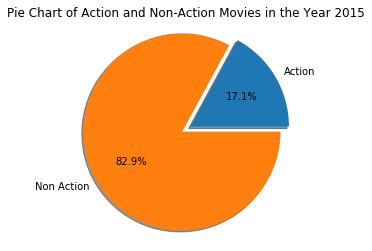

In [40]:
#let A represent an array of the number of Action and Non-Action movies for the year 2000
#Number of Non-Action Movies for 2015 = Total Number of Movies for 2015 - Total Number of Action Movies for 2015
B = np.array([df_gen2015act.genres.count(),((df_gen2015.genres.count())-(df_gen2015act.genres.count()))])
label = ['Action', 'Non Action']
explode = (0.1, 0)
plt.pie(B, explode = explode, labels = label, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.title('Pie Chart of Action and Non-Action Movies in the Year 2015')
plt.show()

Percentage of action movies from 20.8% to 17.1% between 2000 and 2015, while Non-Action movies increased from 79.2% to 89.2% for the same time period.

<a id='conclusions'></a>
## Conclusions

Using the imported libraries:

1. pandas
2. numpy
3. matplotlib

I've been able to analyse the movie dataset and answer the following questions: 

#### What relationship exists, if any between Movie Runtime and Popularity?

Using the scatterplot to plot the runtime values against popularity, no evident relationship can be discerned, however, movie popularity peaks at the movie runtime of 125 minutes and decreases on either side of the distrubition. 

#### How has the average profit for movies changed over time?

There appears to be a very sporadic fluctuation in average movie profit between 1960 and 1980 but appears to stablize from 1980 onwards at around $100 million. Further analysis proves that for the period 1980 - 2015; Average Movie Profits peaked around 1994 (~$140 million) and have somewhat declined since. There seems to be serious reduction in average movie profits during the periods 1986-1988 and 2004-2006.

#### How has the average runtime for movies changed over time?
 
While there appear to be fluctuations in the average runtime of movies, there appears to be a decrease in average movie runtime over the years. 

#### How has the percentage of Action and Non-Action movies changed between 2000 and 2015?

The percentage of action movies decreased from 20.8% to 17.1% between 2000 and 2015, while Non-Action movies increased from 79.2% to 89.2% for the same time period. 

### Limitations

Effective analysis of financial data (budget_adj, revenue_adj) was significantly limited by the number of records in the dataframe where there were 0 values in the respective columns. These had to be omitted to avoid having profit trends skewed. Replacing these 0 values with the mean would not have been effective and would have also skewed potential trends. 

The data source also lacked details on the description of some columns including vote_average. If an explanation of this field was given and it was suggested who was voting (viewers, critics, etc), perhaps some further analysis and trends could have been drawn out, adding further substance to the analysis. 



Multiple genres are listed in each movie record. Given this, "Action Movies" includes any movie where Action is included in the field 'genres' while "Non Action" refers to any movie where Action is missing from the field 'genres'. It would've been useful if the dataset stated whether or not Action was the primary Genre of a movie, providing for some more effective data cleaning and preparation and more in-depth analysis.

Having a state primary genre may have also facilitated a deeper analysis of the average movie runtime of movies. The assessment provided a look at how average movie runtime changed over the years for ALL movies. Its quite possible that different genres have their own respective average runtimes, which could have been drawn out if a more standard genre field was provided. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0